# SMAP L_theta extraction test

## Import libraries

In [ ]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings

## Some parameters

In [166]:
os.chdir(r'G:\Shared drives\Ryoko and Hilary\SMSigxSMAP')
pt_id = 0
in_path = r'.\analysis\1_data\SMAP\KENYA\GEE'
network_name = 'Kenya'


## Read data

In [180]:

precipitation = pd.read_csv(os.path.join(in_path, f'gldas_pcp_pt{pt_id}.csv'))
precipitation['date'] = pd.to_datetime(precipitation['date'], format='%Y-%m-%dT%H:%M:%S')
precipitation.set_index('date', inplace=True)

print(precipitation.head())
print(len(precipitation))

soilMoisture = pd.read_csv(os.path.join(in_path, f'smap_L4_pt{pt_id}.csv'))
soilMoisture['relative_soil_moisture'] = soilMoisture['first']/25
soilMoisture['date'] = pd.to_datetime(soilMoisture['date'], format='%Y-%m-%dT%H:%M:%S')
soilMoisture.set_index('date', inplace=True)

print(soilMoisture.head())
print(len(soilMoisture))

noprecip = precipitation['first'] < 0.00002
soilMoisture['noprecip'] = noprecip

                                                 system:index     first  \
date                                                                      
2017-10-01  1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...  0.000015   
2017-10-02  1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...  0.000001   
2017-10-03  1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...  0.000018   
2017-10-04  1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...  0.000000   
2017-10-05  1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...  0.000014   

                                                         .geo  
date                                                           
2017-10-01  {"type":"Point","coordinates":[35.472189247418...  
2017-10-02  {"type":"Point","coordinates":[35.472189247418...  
2017-10-03  {"type":"Point","coordinates":[35.472189247418...  
2017-10-04  {"type":"Point","coordinates":[35.472189247418...  
2017-10-05  {"type":"Point","coordinates":[35.472189247418...  
91
                       

# Get drydown rates for no precipitation period

In [181]:
soilMoisture['dSdt'] = soilMoisture['relative_soil_moisture'].diff()
soilMoisture['dSdt'][soilMoisture['dSdt']>0] = np.nan
soilMoisture['dSdt(t+1)'] = soilMoisture['dSdt'].shift(periods=-1).copy()
soilMoisture[['relative_soil_moisture','dSdt(t+1)', 'noprecip']]


R:\Temp\ipykernel_17960\1860699247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soilMoisture['dSdt'][soilMoisture['dSdt']>0] = np.nan


,relative_soil_moisture,dSdt(t+1),noprecip
date,,,
2017-10-03,0.675567,-0.105478,True
2017-10-06,0.570089,NaN,True
2017-10-09,0.771560,NaN,False
2017-10-12,0.795521,-0.004424,False
2017-10-15,0.791096,NaN,False
2017-10-18,1.010038,-0.203703,False
2017-10-21,0.806335,NaN,False
2017-10-24,0.962522,-0.059878,False
2017-10-27,0.902644,-0.183289,True


# Plot the timesereis of data


In [172]:
# prep
pt = json.loads(soilMoisture['.geo'].unique()[0])
print(pt)
lat = pt["coordinates"][1]
lon = pt["coordinates"][0]

smap_color = '#ff7f0e'
precip_color = '#779eb2'

title = f"{network_name}\n({lat:.2f}, {lon:.2f})"


{'type': 'Point', 'coordinates': [35.4721892474189, -0.7096003903727603]}


##  Timeseries of data and Ltheta function

R:\Temp\ipykernel_17960\3158997603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soilMoisture['values_while_drydown'][drydown_period==False] = np.nan
R:\Temp\ipykernel_17960\3158997603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soilMoisture['values_while_drydown'][noprecip_with_buffer==False] = np.nan


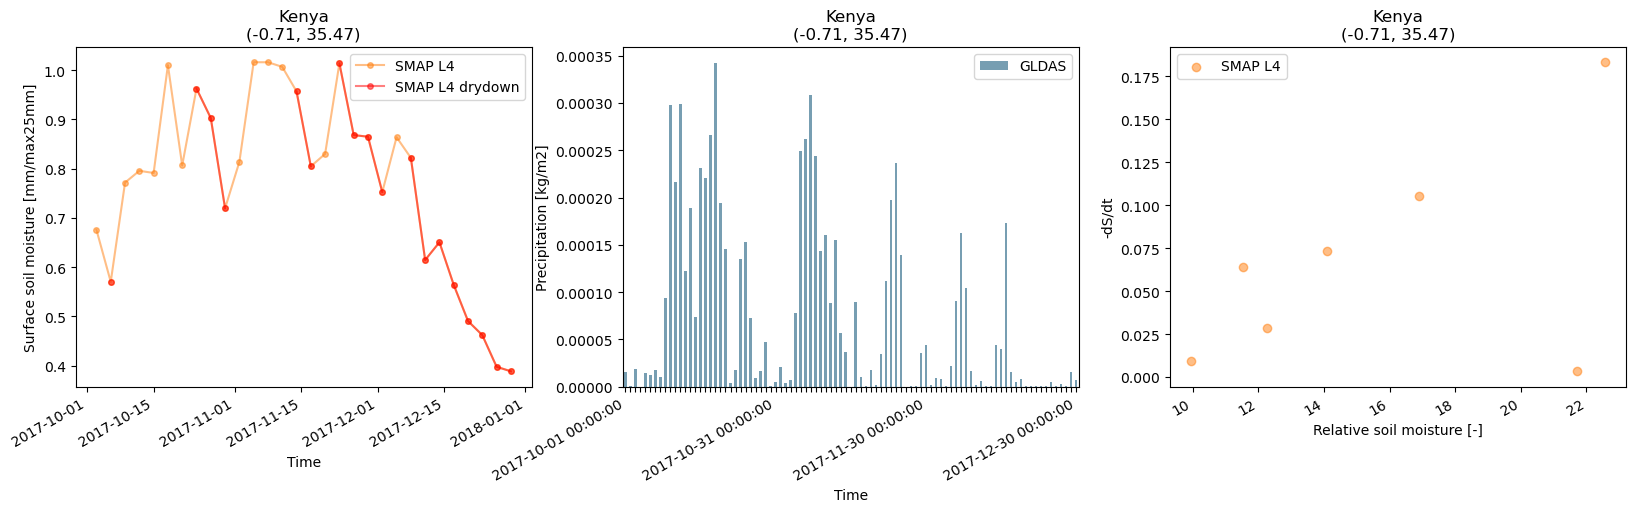

In [182]:

# Get drydown timeseries for plotting
soilMoisture['values_while_drydown'] = soilMoisture['relative_soil_moisture']
drydown_period = soilMoisture['dSdt(t+1)'].notna()
drydown_period = drydown_period.shift(periods=+1) | drydown_period
soilMoisture['values_while_drydown'][drydown_period==False] = np.nan
noprecip_with_buffer = (soilMoisture['noprecip']==True) | (soilMoisture['noprecip'].shift(periods=-1)==True)
soilMoisture['values_while_drydown'][noprecip_with_buffer==False] = np.nan

# SMAP timeseries 
fig = plt.figure(figsize=(20, 5))
# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))
ax1 = fig.add_subplot(1,3,1)
line1, = ax1.plot(soilMoisture['relative_soil_moisture'], '-o', markersize=4, alpha=0.5, label='SMAP L4', color=smap_color)
line2, = ax1.plot(soilMoisture['values_while_drydown'], '-o', markersize=4, alpha=0.5, label='SMAP L4 drydown', color='red')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Time")
# ax.set_ylabel("Volumetric soil water content [m^3/m^3]")
ax1.set_ylabel("Surface soil moisture [mm/max25mm]")
ax1.legend()

# Precipitation
ax2 =  fig.add_subplot(1,3,2)
precipitation.plot.bar(y='first', ax=ax2, label='GLDAS', color=precip_color)
ax2.set_title(title)
ax2.set_xlabel("Time")
ax2.set_ylabel("Precipitation [kg/m2]")
ax2.legend()
for ind, label in enumerate(ax2.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
# fig.savefig('../3_data_out/test_ts.png')


sm = soilMoisture['first'][soilMoisture['noprecip']].values
neg_dSdt = soilMoisture['dSdt(t+1)'][soilMoisture['noprecip']].values*-1

ax3 =  fig.add_subplot(1,3,3)
scatter = ax3.scatter(x=sm, y=neg_dSdt, marker='o', alpha=0.5, label='SMAP L4', color=smap_color)
xax = ax3.xaxis
ax3.set_title(title)
ax3.set_xlabel("Relative soil moisture [-]")
ax3.set_ylabel("-dS/dt")
ax3.legend()

fig.autofmt_xdate()
# fig.savefig('../3_data_out/test_ts.png')


## Histogram for data check

Text(0, 0.5, 'Normalized frequency [-]')

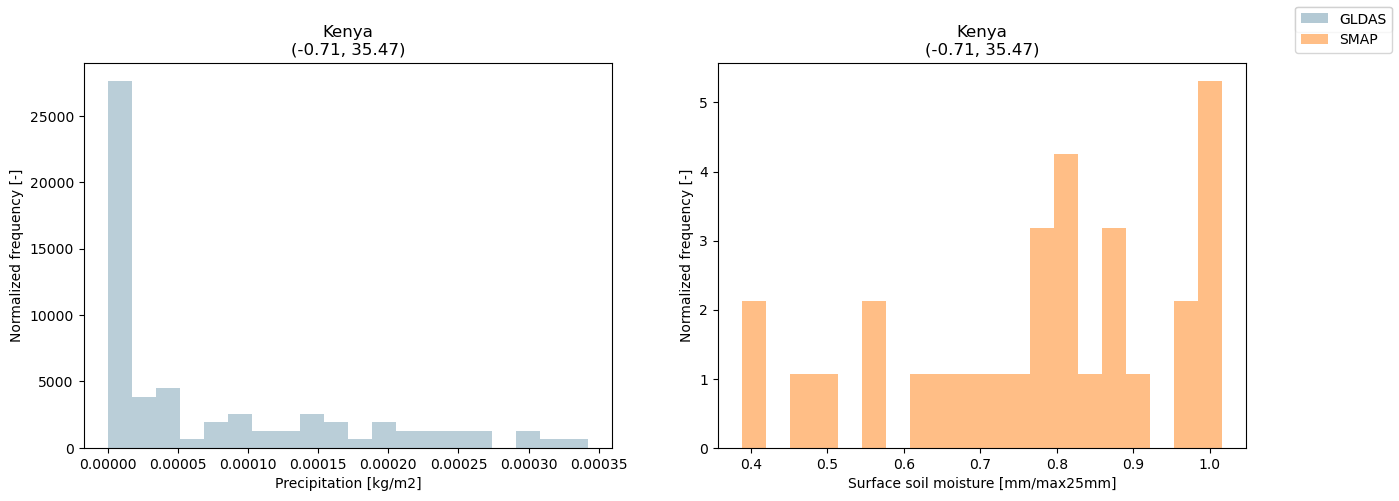

In [183]:
# SMAP timeseries 
fig = plt.figure(figsize=(15, 5))
# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))

# Plot the histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(precipitation['first'], label='GLDAS', bins=20, alpha = 0.5, density=True, stacked=True, color=precip_color)
fig.legend()
ax1.set_title(title)
ax1.set_xlabel("Precipitation [kg/m2]")
ax1.set_ylabel("Normalized frequency [-]")
# fig.savefig('../3_data_out/test_hist.png')

# Plot the histogram
ax2 = fig.add_subplot(1,2,2)
ax2.hist(soilMoisture['relative_soil_moisture'], label='SMAP', bins=20, alpha = 0.5, density=True, stacked=True, color=smap_color)
fig.legend()
ax2.set_title(title)
# ax.set_xlabel("Volmetric soil water content [m^3/m^3]")
ax2.set_xlabel("Surface soil moisture [mm/max25mm]")
ax2.set_ylabel("Normalized frequency [-]")

# fig.savefig('../3_data_out/test_hist.png')